# A simple Artificial Neural Network to predict Dishwasher

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/Crimson/Desktop/Neural_Net/New_Data/Merge1/all_houses1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [3]:
df = df.drop(['Time'],axis =1)
df

,Month,Weekday,Hour,Occupancy,Appliances Owned,Type,Size,Washing Machine,Dishwasher,Television Site,Microwave,Kettle
0,10,2,13,4,23,1,3,0,0,0,0,0
1,10,2,13,4,23,1,3,0,0,0,0,0
2,10,2,13,4,23,1,3,0,0,0,0,0
3,10,2,13,4,23,1,3,0,0,0,0,0
4,10,2,13,4,23,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
702492,5,5,13,4,23,1,3,50,0,595,0,0
702493,5,5,13,4,23,1,3,50,0,583,0,0
702494,5,5,13,4,23,1,3,50,0,580,0,0
702495,5,5,14,4,23,1,3,50,0,584,0,0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
from sklearn.model_selection import train_test_split
from pandas import read_csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Binarize Data of Appliances

In [5]:
df['Washing Machine'] = (df['Washing Machine']> 1).astype(int)
df['Dishwasher'] = (df['Dishwasher'] > 1).astype(int)
df['Television Site'] = (df['Television Site'] > 1).astype(int)
df['Microwave'] = (df['Microwave'] > 1).astype(int)
df['Kettle'] = (df['Kettle'] > 1).astype(int)

# Handle Imbalance data with Oversampling Minority Class

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,  recall_score

In [7]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [8]:
print(df.Dishwasher.value_counts())

0    659428
1     43069
Name: Dishwasher, dtype: int64


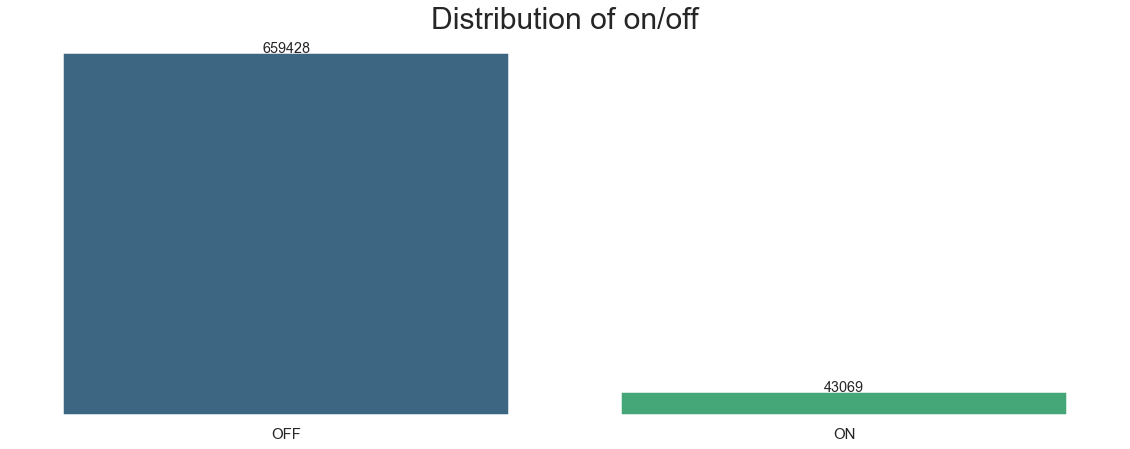

In [9]:
fig, ax = plt.subplots()
g = sns.countplot(df.Dishwasher, palette='viridis')
g.set_xticklabels(['OFF', 'ON'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of on/off', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()


In [10]:
# print percentage of questions where target == 1
(len(df.loc[df.Dishwasher==1])) / (len(df.loc[df.Dishwasher == 0])) * 100

6.531266491565417

In [11]:
# Prepare data for modeling
# Separate input features and target
y = df.Dishwasher
X = df.drop('Dishwasher', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
from sklearn.utils import resample

In [13]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Month,Weekday,Hour,Occupancy,Appliances Owned,Type,Size,Washing Machine,Television Site,Microwave,Kettle,Dishwasher
87537,2,0,1,4,23,1,3,0,0,0,0,0
260894,2,5,6,4,23,2,3,0,0,0,0,0
401490,6,3,10,4,23,2,3,0,0,0,0,0
648090,12,6,19,4,23,1,3,0,1,1,0,0
390837,5,1,10,4,23,2,3,0,0,0,0,0


In [14]:
# separate minority and majority classes
off = X[X.Dishwasher==0]
on = X[X.Dishwasher==1]

In [15]:
# upsample minority
on_upsampled = resample(on,
                          replace=True, # sample with replacement
                          n_samples=len(off), # match number in majority class
                          random_state=27) # reproducible results

In [16]:
# combine majority and upsampled minority
upsampled = pd.concat([off, on_upsampled])

In [17]:
# check new kettle counts
upsampled.Dishwasher.value_counts()

1    527402
0    527402
Name: Dishwasher, dtype: int64

In [18]:
y_train = upsampled.Dishwasher
X_train = upsampled.drop('Dishwasher', axis=1)

# Simple Model of  Artificial NeuralNet

In [19]:
from tensorflow.keras import regularizers

In [20]:
#Last time with regularization 0.01 accuracy was 86 and macro was 69

In [21]:
model = Sequential()
model.add(tf.keras.layers.Dense(units=320, activation='relu', input_dim=11, kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 320)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               41088     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 55,297
Trainable params: 55,297
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train.to_numpy(), batch_size=64, epochs=60)

Epoch 1/60
16482/16482 [==============================] - 12s 741us/step - loss: 0.4155 - accuracy: 0.8303
Epoch 2/60
16482/16482 [==============================] - 12s 741us/step - loss: 0.3633 - accuracy: 0.8492
Epoch 3/60
16482/16482 [==============================] - 12s 746us/step - loss: 0.3495 - accuracy: 0.8555
Epoch 4/60
16482/16482 [==============================] - 12s 748us/step - loss: 0.3395 - accuracy: 0.8598
Epoch 5/60
16482/16482 [==============================] - 12s 758us/step - loss: 0.3319 - accuracy: 0.8634
Epoch 6/60
16482/16482 [==============================] - 12s 747us/step - loss: 0.3271 - accuracy: 0.8659
Epoch 7/60
16482/16482 [==============================] - 12s 740us/step - loss: 0.3222 - accuracy: 0.8684
Epoch 8/60
16482/16482 [==============================] - 13s 779us/step - loss: 0.3186 - accuracy: 0.8703
Epoch 9/60
16482/16482 [==============================] - 12s 753us/step - loss: 0.3162 - accuracy: 0.8714
Epoch 10/60
16482/16482 [============

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test.to_numpy())

4391/4391 [==============================] - 2s 490us/step - loss: 0.3383 - accuracy: 0.8469


In [24]:
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 84.69%


In [25]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [26]:
print(y_pred)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [27]:
print(y_test)

201588    0
96037     0
605412    0
282369    0
77909     0
         ..
196647    0
509325    0
699465    0
586449    0
698114    0
Name: Dishwasher, Length: 140500, dtype: int32


In [28]:
y_test = y_test.to_numpy()

In [29]:
index = 0
print(f"y_pred[{index}]: {y_pred[index]}") 
print(f"y_test[{index}]: {y_test[index]}")

y_pred[0]: [0]
y_test[0]: 0


# confusion matrix

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[111091  20935]
 [   578   7896]]


In [31]:
# calculate accuracy based on confusion matrix
acc_cm = accuracy_score(y_test, y_pred)
print(f"Accuracy of Confusion Matrix: {acc_cm*100:.2f}%")

Accuracy of Confusion Matrix: 84.69%


# Classification Report

In [32]:
from sklearn.metrics import precision_score

print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.27387187402448754


              precision    recall  f1-score   support

           0       0.99      0.84      0.91    132026
           1       0.27      0.93      0.42      8474

    accuracy                           0.85    140500
   macro avg       0.63      0.89      0.67    140500
weighted avg       0.95      0.85      0.88    140500



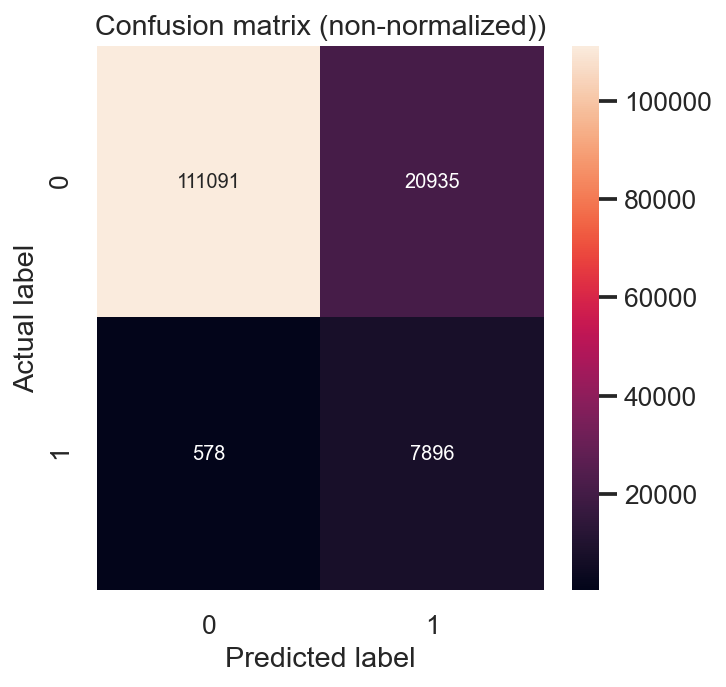

In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             roc_auc_score)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
  
report = classification_report(y_test, y_pred)
print(report)
  
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion matrix (non-normalized))")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
  
plot_cm(y_test, y_pred)

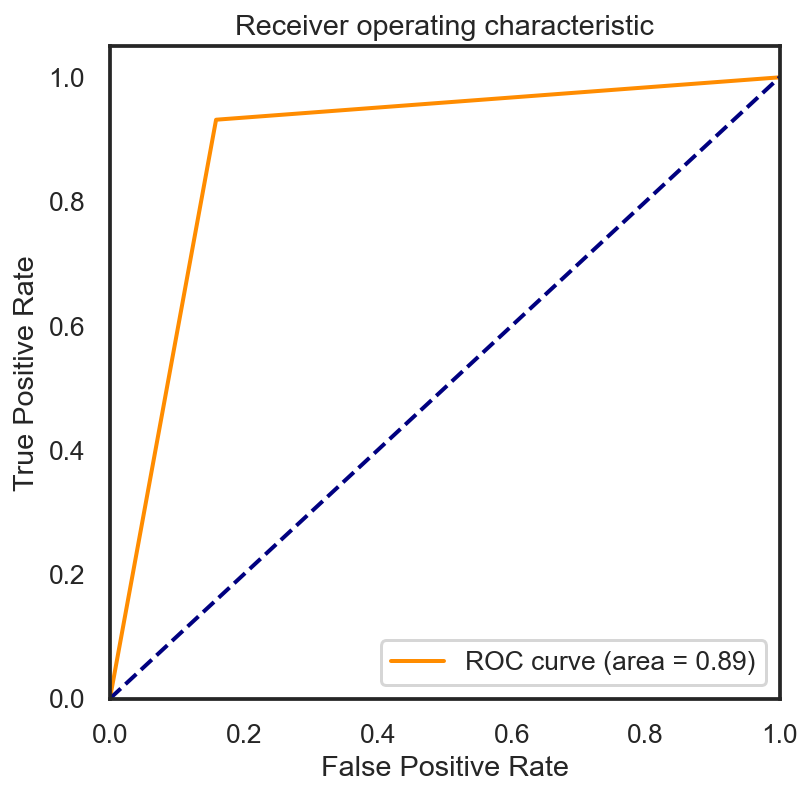

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
  
mpl.rcParams["figure.figsize"] = (6, 6)
  
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score
  
# Binarize the output
y_bin = label_binarize(y_test, classes=[0, 1])
n_classes = 1
  
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in  range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc[i] = auc(fpr[i], tpr[i])
  
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
  
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()